# House Price Prediction Project


Importing the relevant Libraries and Loading the Dataset

In [1]:
import pandas as pd
import numpy as np

import matplotlib

#module provides a simple interface for creating various types of plots and charts.
from matplotlib import pyplot as plt

#command that allows the output of Matplotlib commands to be displayed directly within the notebook.
%matplotlib inline 

#sets the default size with width of 20 units and a height of 10 units.
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


We drop the 'area_type', 'avaialability', 'society', 'balcony' columns because we dont need them for our model

In [3]:
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


## Data Cleaning

## "Location"

_We first work with the 'location' column by coverting the location into lower case. Then we remove any extra spaces and leading & trailing spaces that might exist with the str.replace() and str.strip() function_

In [4]:
df2['location'] = df2['location'].str.lower()


In [5]:
# Remove extra spaces from the 'location' column
df2['location'] = df2['location'].str.replace('\s+', ' ', regex=True)

In [6]:
# Use the str.strip() method to remove leading and trailing whitespaces from the 'location' column
df2['location'] = df2['location'].str.strip()

# Display the updated 'location' column
print(df2['location'])

0        electronic city phase ii
1                chikka tirupathi
2                     uttarahalli
3              lingadheeranahalli
4                        kothanur
                   ...           
13315                  whitefield
13316               richards town
13317       raja rajeshwari nagar
13318             padmanabhanagar
13319                doddathoguru
Name: location, Length: 13320, dtype: object


## Size
_We extract the numeric part from the 'size' column in DataFrame df2, which likely contains entries like '2 BHK' or '3 Bedroom', creating a new 'bhk' column. It then converts the 'bhk' column to a numeric data type, handling non-numeric cases by replacing them with NaN._

In [7]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [8]:
# Extract only the numeric part from the 'size' column and create a new 'bhk' column
df2['bhk'] = df2['size'].str.extract('(\d+)')

# Convert the 'bhk' column to numeric type
df2['bhk'] = pd.to_numeric(df2['bhk'], errors='coerce')

# Display the updated DataFrame
print(df2[['size', 'bhk']])

            size  bhk
0          2 BHK  2.0
1      4 Bedroom  4.0
2          3 BHK  3.0
3          3 BHK  3.0
4          2 BHK  2.0
...          ...  ...
13315  5 Bedroom  5.0
13316      4 BHK  4.0
13317      2 BHK  2.0
13318      4 BHK  4.0
13319      1 BHK  1.0

[13320 rows x 2 columns]


## Total_Sqft

_The code aims to clean and standardize the 'total_sqft' column in DataFrame df2. The is_float function identifies non-numeric entries in the column. The convert_sqft_to_num function handles ranges (e.g., '1000-1500') by taking their average and converts other valid numeric entries._

_This ensures uniformity and enables meaningful numerical analysis on square footage. Non-convertible or missing values are set to None. The resulting DataFrame df3 only includes valid numeric 'total_sqft' values, removing inconsistencies._

In [9]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [10]:
df2[~df2['total_sqft'].apply(is_float)].head(7)


,location,size,total_sqft,bath,price,bhk
30,yelahanka,4 BHK,2100 - 2850,4.0,186.000,4.0
56,devanahalli,4 Bedroom,3010 - 3410,NaN,192.000,4.0
81,hennur road,4 Bedroom,2957 - 3450,NaN,224.500,4.0
122,hebbal,4 BHK,3067 - 8156,4.0,477.000,4.0
137,8th phase jp nagar,2 BHK,1042 - 1105,2.0,54.005,2.0
165,sarjapur,2 BHK,1145 - 1340,2.0,43.490,2.0
188,kr puram,2 BHK,1015 - 1540,2.0,56.800,2.0


In [11]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [12]:
df3 = df2.copy()
df3.total_sqft = df3.total_sqft.apply(convert_sqft_to_num)
df3 = df3[df3.total_sqft.notnull()] #Rows where 'total_sqft' is null are removed from the DataFrame
df3.head(4)

,location,size,total_sqft,bath,price,bhk
0,electronic city phase ii,2 BHK,1056.0,2.0,39.07,2.0
1,chikka tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0
2,uttarahalli,3 BHK,1440.0,2.0,62.00,3.0
3,lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0


## Bath

_The provided code calculates the median value of the 'bath' column in DataFrame df3. The median is a measure of central tendency that helps handle missing values in a robust manner. Subsequently, the code fills any missing values in the 'bath' column with this calculated median. This approach is effective for maintaining the overall statistical characteristics of the data while addressing missing values, especially when the distribution of the 'bath' values is skewed. The inplace=True parameter ensures that the changes are made directly to the DataFrame, and the updated DataFrame is then printed, reflecting the imputation of missing 'bath' values with the calculated median_

In [13]:
# Calculate the median value of the 'bath' column
median_bath = df3['bath'].median()

# Fill missing values in the 'bath' column with the median
df3['bath'].fillna(median_bath, inplace=True)

# Convert the 'bath' column to integer
df3['bath'] = df3['bath'].astype(int)

# Display the updated DataFrame
print(df3)

                       location       size  total_sqft  bath   price  bhk
0      electronic city phase ii      2 BHK      1056.0     2   39.07  2.0
1              chikka tirupathi  4 Bedroom      2600.0     5  120.00  4.0
2                   uttarahalli      3 BHK      1440.0     2   62.00  3.0
3            lingadheeranahalli      3 BHK      1521.0     3   95.00  3.0
4                      kothanur      2 BHK      1200.0     2   51.00  2.0
...                         ...        ...         ...   ...     ...  ...
13315                whitefield  5 Bedroom      3453.0     4  231.00  5.0
13316             richards town      4 BHK      3600.0     5  400.00  4.0
13317     raja rajeshwari nagar      2 BHK      1141.0     2   60.00  2.0
13318           padmanabhanagar      4 BHK      4689.0     4  488.00  4.0
13319              doddathoguru      1 BHK       550.0     1   17.00  1.0

[13274 rows x 6 columns]


In [14]:
df4 = df3.dropna()
df4.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

#  Feature Engineering

_Calculating "price per square foot" in real estate is crucial for standardized property comparisons. As properties vary in size, absolute prices may not accurately reflect their value. Price per square foot provides a normalized metric, aiding in fair assessments and trend analysis. It's widely used in market analysis, helping identify changing property values and supporting decision-making for buyers and investors. Moreover, appraisers use it for property valuation, ensuring competitive pricing._

In [15]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,electronic city phase ii,2 BHK,1056.0,2,39.07,2.0,3699.810606
1,chikka tirupathi,4 Bedroom,2600.0,5,120.00,4.0,4615.384615
2,uttarahalli,3 BHK,1440.0,2,62.00,3.0,4305.555556
3,lingadheeranahalli,3 BHK,1521.0,3,95.00,3.0,6245.890861
4,kothanur,2 BHK,1200.0,2,51.00,2.0,4250.000000


In [16]:
df5.to_csv("bhp.csv",index=False)

_Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations_

_Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns_

In [17]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5['location'].value_counts(ascending=False)
location_stats

whitefield                538
sarjapur road             397
electronic city           304
kanakpura road            271
thanisandra               236
                         ... 
rahat bagh                  1
maruthi hbcs layout         1
nagarbhavi bda complex      1
rajanna layout              1
abshot layout               1
Name: location, Length: 1275, dtype: int64

In [18]:
location_stats.values.sum()

13257

In [19]:
len(location_stats[location_stats>10])


240

In [20]:
len(location_stats)


1275

In [21]:
len(location_stats[location_stats<=10])


1035

In [22]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

1st block koramangala     10
nagadevanahalli           10
thyagaraja nagar          10
kalkere                   10
naganathapura             10
                          ..
rahat bagh                 1
maruthi hbcs layout        1
nagarbhavi bda complex     1
rajanna layout             1
abshot layout              1
Name: location, Length: 1035, dtype: int64

In [23]:
len(df5.location.unique())


1275

In [24]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

241

# Outlier Removal Using Business Logic

_As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft_

In [25]:
df5[df5.total_sqft/df5.bhk<300].head()


,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6,370.0,6.0,36274.509804
45,hsr layout,8 Bedroom,600.0,9,200.0,8.0,33333.333333
58,murugeshpalya,6 Bedroom,1407.0,4,150.0,6.0,10660.980810
68,devarachikkanahalli,8 Bedroom,1350.0,7,85.0,8.0,6296.296296
70,other,3 Bedroom,500.0,3,100.0,3.0,20000.000000


#### _Check above data points. We have 6 bhk apartment with 1020 sqft. Another one is 8 bhk and total sqft is 600. These are clear data errors that can be removed safely_

In [26]:
df5.shape

(13257, 7)

_The code_ df6 = df5[~(df5.total_sqft/df5.bhk<300)] _filters out rows from DataFrame df5 where the ratio of total square footage to the number of bedrooms (bhk) is less than 300. This filtering likely aims to remove outliers or entries where the average square footage per bedroom is exceptionally low, possibly indicating data anomalies or inaccuracies_

In [27]:
#Removing rows where the ratio of 'total_sqft' to 'bhk' is less than 300.
df6 = df5[~(df5.total_sqft/df5.bhk<300)] 
df6.shape

(12513, 7)

# Outlier Removal Using Mean and Standard Deviation

In [28]:
df6.price_per_sqft.describe()


count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

_Here we find that min price per sqft is 267 rs/sqft whereas max is 176470, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation_

_The function remove_pps_outliers refines a real estate DataFrame by eliminating outliers in the 'price_per_sqft' column for each location. It iterates through location groups, calculates the mean and standard deviation of 'price_per_sqft,' and filters out entries lying beyond one standard deviation from the mean. The resulting DataFrame, df7, is a curated dataset where extreme price per square foot values, potentially indicative of anomalies or outliers, have been excluded._

In [29]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame() #Empty DataFrame, df_out, is initialized. This will be used to store the filtered data 
    for key, subdf in df.groupby('location'): #Grouped by 'location,' and the function iterates over each group.
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(10288, 7)

_The plot_scatter_chart function visualizes property prices in a real estate DataFrame for a specific location. It filters the data for 2 BHK and 3 BHK properties in the given location, creating scatter plots with total square footage on the x-axis and price on the y-axis_

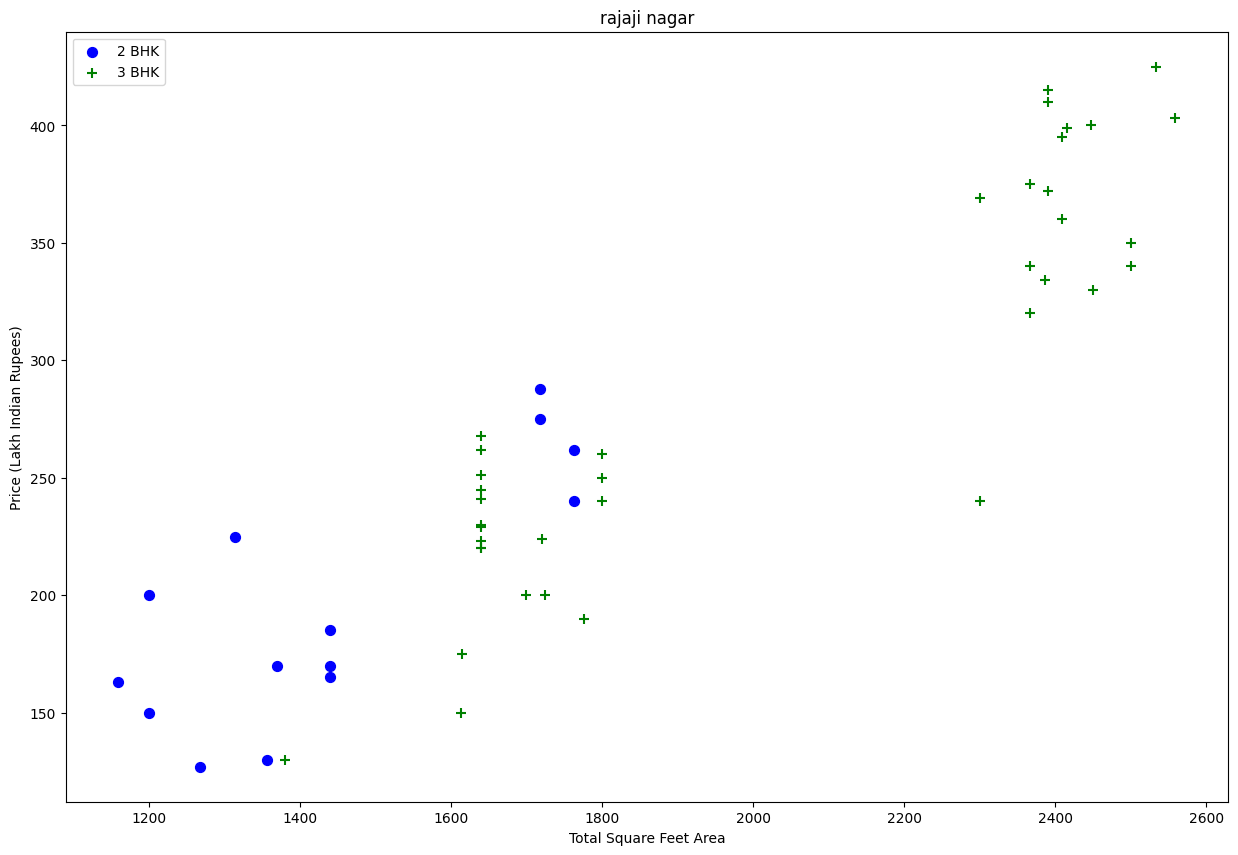

In [30]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"rajaji nagar")

_The remove_bhk_outliers function refines a real estate DataFrame by excluding outliers in the 'price_per_sqft' column based on the number of bedrooms ('bhk') within each location. It iterates through location-specific data and calculates statistics for each bedroom configuration. Outliers are identified by comparing the price per square foot to the mean of the previous bedroom configuration, considering only configurations with a count greater than 5. The resulting indices of outliers are stored, and the DataFrame is refined by removing these outliers._

_The function remove_bhk_outliers identifies and removes outliers from a DataFrame (df) based on the 'price_per_sqft' column within each bedroom configuration ('bhk') for different locations. It calculates the mean and standard deviation of 'price_per_sqft' for each bedroom configuration and excludes data points that fall below the mean of the previous bedroom configuration if there are enough data points (count > 5). This process helps filter out inconsistent pricing patterns._

In [31]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7342, 7)

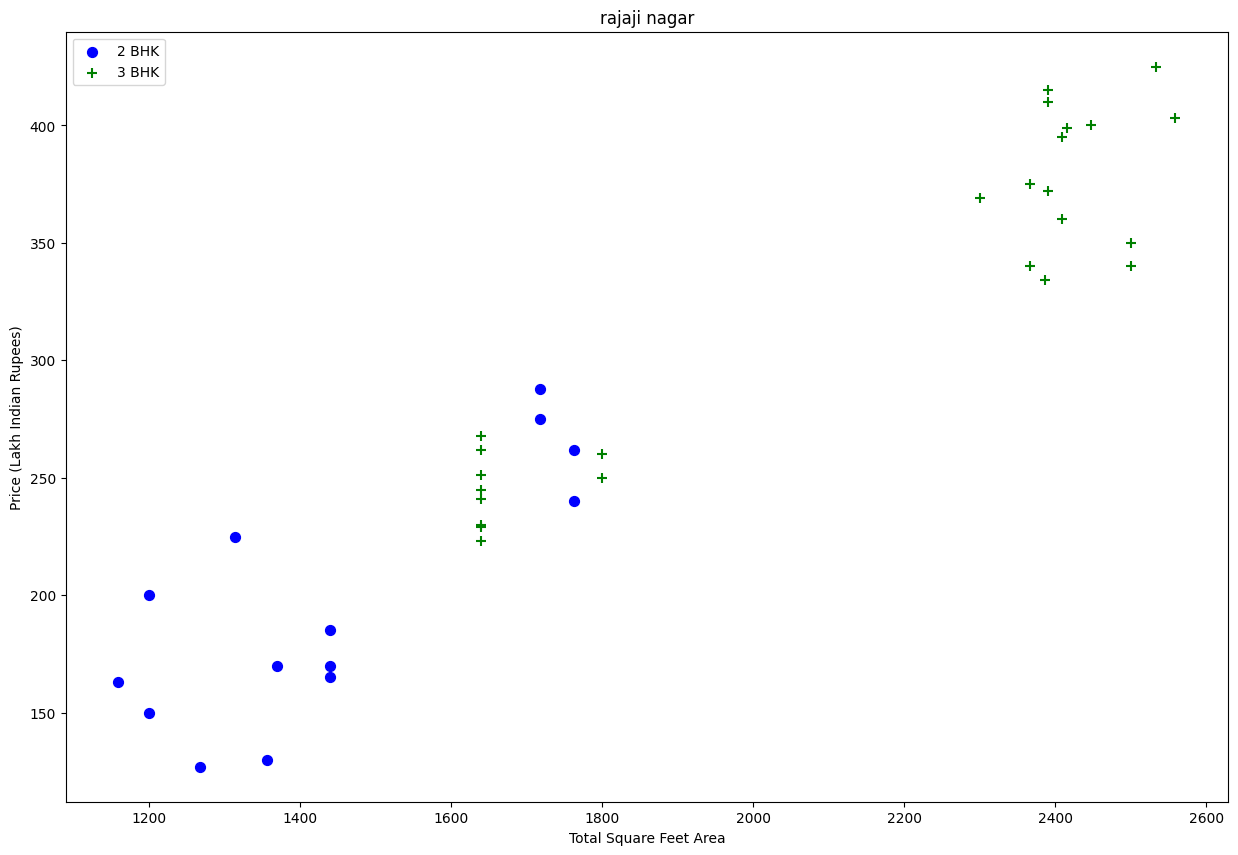

In [32]:
plot_scatter_chart(df8,"rajaji nagar")


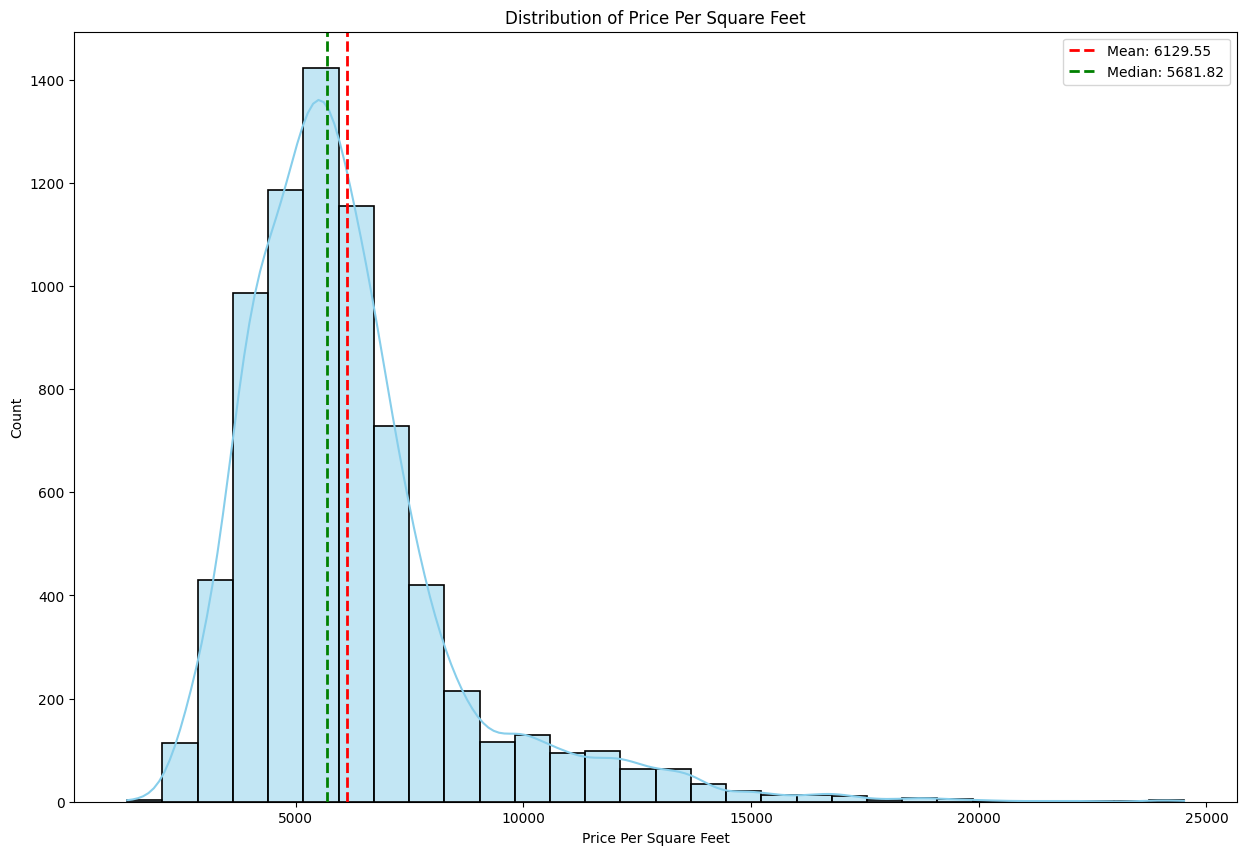

In [33]:
import seaborn as sns

# Assuming df8 is your DataFrame
plt.figure(figsize=(15, 10))

# Use Seaborn's histplot for a more detailed plot
sns.histplot(df8.price_per_sqft, bins=30, kde=True, color='skyblue', edgecolor='black', linewidth=1.2)

plt.title("Distribution of Price Per Square Feet")
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

# Add mean and median lines
mean_price_per_sqft = df8.price_per_sqft.mean()
median_price_per_sqft = df8.price_per_sqft.median()
plt.axvline(mean_price_per_sqft, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_price_per_sqft:.2f}')
plt.axvline(median_price_per_sqft, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_price_per_sqft:.2f}')

# Add legend
plt.legend()

plt.show()


# Outlier Removal Using Bath Feature


In [34]:
df8.bath.unique()


array([ 4,  3,  2,  5,  8,  1,  6,  7,  9, 12, 16, 13])

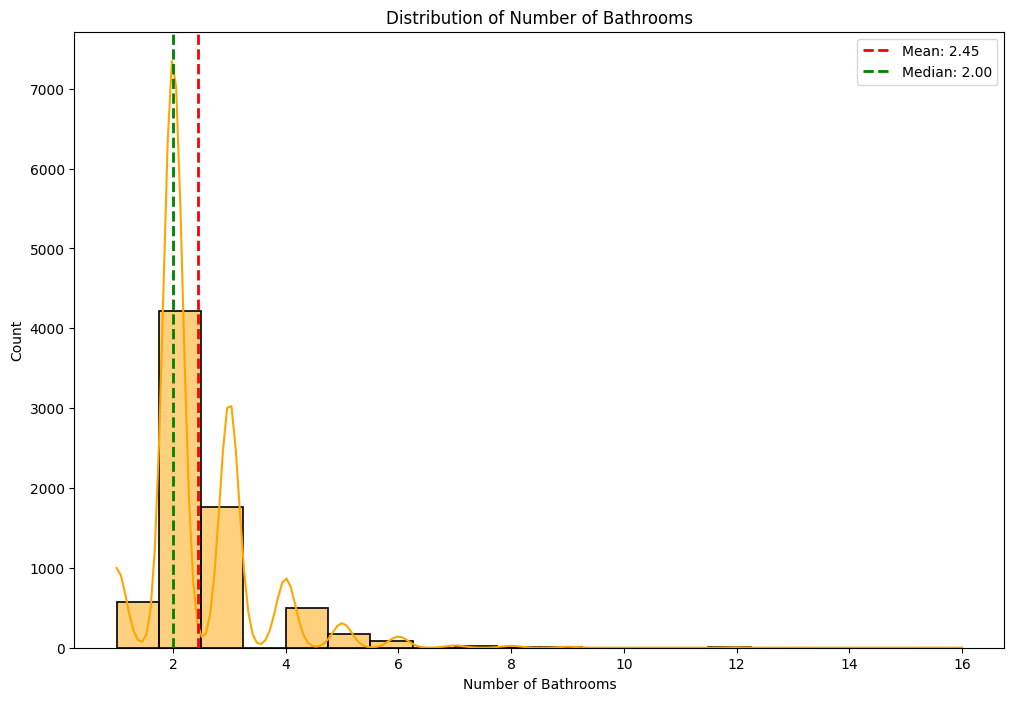

In [35]:
# Assuming df8 is your DataFrame
plt.figure(figsize=(12, 8))

# Use Seaborn's histplot for a more detailed plot
sns.histplot(df8.bath, bins=20, kde=True, color='orange', edgecolor='black', linewidth=1.2)

plt.title("Distribution of Number of Bathrooms")
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")

# Add mean and median lines
mean_bath = df8.bath.mean()
median_bath = df8.bath.median()
plt.axvline(mean_bath, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_bath:.2f}')
plt.axvline(median_bath, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_bath:.2f}')

# Add legend
plt.legend()

plt.show()


In [36]:
df8[df8.bath>10]


,location,size,total_sqft,bath,price,bhk,price_per_sqft
5290,neeladri nagar,10 BHK,4000.0,12,160.0,10.0,4000.000000
5955,other,10 BHK,12000.0,12,525.0,10.0,4375.000000
6044,other,16 BHK,10000.0,16,550.0,16.0,5500.000000
6779,other,11 BHK,6000.0,12,150.0,11.0,2500.000000
7110,other,13 BHK,5425.0,13,275.0,13.0,5069.124424


_It is unusual to have 2 more bathrooms than number of bedrooms in a home_

In [37]:
df8[df8.bath>df8.bhk+2]


,location,size,total_sqft,bath,price,bhk,price_per_sqft
1607,chikkabanavar,4 Bedroom,2460.0,7,80.0,4.0,3252.032520
5251,nagasandra,4 Bedroom,7000.0,8,450.0,4.0,6428.571429
5880,other,6 BHK,11338.0,9,1000.0,6.0,8819.897689
9056,thanisandra,3 BHK,1806.0,6,116.0,3.0,6423.034330


_Again the business manager has a conversation with you (i.e. a data scientist) that if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed_

In [38]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7264, 7)

In [39]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,bhk
0,1st block jayanagar,2850.0,4,428.0,4.0
1,1st block jayanagar,1630.0,3,194.0,3.0
2,1st block jayanagar,1875.0,2,235.0,3.0


# One Hot Encoding for Locations

In [40]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,1st block jayanagar,1st phase jp nagar,2nd phase judicial layout,2nd stage nagarbhavi,5th block hbr layout,5th phase jp nagar,6th phase jp nagar,7th phase jp nagar,8th phase jp nagar,9th phase jp nagar,...,vijayanagar,vishveshwarya layout,vishwapriya layout,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yelenahalli,yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk,1st block jayanagar,1st phase jp nagar,2nd phase judicial layout,2nd stage nagarbhavi,5th block hbr layout,...,vijayanagar,vishveshwarya layout,vishwapriya layout,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yelenahalli,yeshwanthpur
0,1st block jayanagar,2850.0,4,428.0,4.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st block jayanagar,1630.0,3,194.0,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st block jayanagar,1875.0,2,235.0,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st block jayanagar,1200.0,2,130.0,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st block jayanagar,1235.0,2,148.0,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Dropping the original 'location' column after creating dummy variables:

Avoiding the Dummy Variable Trap:Drop one of the dummy variables to avoid multicollinearity issues. Dropping one dummy variable ensures that the information in the 'location' column is not redundant and doesn't introduce linear dependence among the dummy variables.

Reducing Dimensionality: Keeping all dummy variables would increase the dimensionality of your dataset unnecessarily. This can lead to computational inefficiency and may negatively impact the performance of certain machine learning algorithms.

Enhancing Interpretability: The model becomes more interpretable when you drop one dummy variable. The coefficients of the remaining dummy variables represent the effect of that category compared to the dropped category.

In [42]:
df12 = df11.drop('location',axis='columns')

# Model Biulding

In [43]:
df12.shape


(7264, 244)

In [44]:
X = df12.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,bhk,1st block jayanagar,1st phase jp nagar,2nd phase judicial layout,2nd stage nagarbhavi,5th block hbr layout,5th phase jp nagar,6th phase jp nagar,...,vijayanagar,vishveshwarya layout,vishwapriya layout,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yelenahalli,yeshwanthpur
0,2850.0,4,4.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
X.shape


(7264, 243)

In [46]:
y = df12.price
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In the train_test_split function from scikit-learn, the random_state parameter is used to seed the random number generator that shuffles the data before splitting it. This is important for reproducibility._

When you set a specific value for random_state, you ensure that the random splitting is the same every time you run your code, assuming all other parameters remain constant. This is useful for:

Reproducibility: Ensures that the data split is the same every time the code is executed. This is crucial when you want to reproduce the same results, debug, or share your work with others.
Consistency:

If you're comparing different models or tweaking hyperparameters, fixing the random state allows for a fair comparison, as the training and test sets remain consistent._

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [48]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8496754232032762

In summary, this code snippet employs ShuffleSplit cross-validation to assess the performance of a linear regression model using R^2 scores, providing an estimate of the model's generalization performance across different train-test splits.

In [49]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.80554837, 0.88051206, 0.88567915, 0.81189335, 0.84237725])

In [50]:
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error'],  # Updated criterion
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Assuming X and y are defined elsewhere in your code
find_best_model_using_gridsearchcv(X, y)


,model,best_score,best_params
0,linear_regression,0.845202,{'normalize': False}
1,lasso,0.695358,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.779305,"{'criterion': 'squared_error', 'splitter': 'be..."


In [51]:
import warnings

def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns == location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    # Suppress the specific warning
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=UserWarning)
        return lr_clf.predict([x])[0]


In [52]:
predict_price('1st phase jp nagar', 1000, 2, 2)


83.31065409635654

In [53]:
predict_price('indira nagar',1000, 2, 2)


180.26530459638548

Using pickle to save a machine learning model, like the linear regression model (lr_clf), provides persistence, reusability, and portability. It allows the model to be stored as a file, ensuring that the trained state is preserved. This pickled file can be easily transported across different environments, integrated into applications, and efficiently loaded for making predictions without the need for retraining. Overall, pickle facilitates the convenient and effective deployment of machine learning models in various scenarios.

In [54]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [55]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))